In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE

In [6]:
GSK = pd.read_csv('D:/GSK.csv',index_col=0, parse_dates=True)
JNJ = pd.read_csv('D:/JNJ.csv',index_col=0, parse_dates=True)
MRK = pd.read_csv('D:/MRK.csv',index_col=0, parse_dates=True)
PFE = pd.read_csv('D:/PFE.csv',index_col=0, parse_dates=True)
SNY = pd.read_csv('D:/SNY.csv',index_col=0, parse_dates=True)

In [20]:
GSK

Adj Close  Virus  Flu  Vaccine
Date                                      
2010-11-01  22.901985      5   12       13
2010-12-01  23.464359      5   16        9
2011-01-01  21.735352      5   18       12
2011-02-01  23.099413      5   13       12
2011-03-01  23.348209      5    9       13
...               ...    ...  ...      ...
2020-07-01  39.345814      9   22       67
2020-08-01  38.643208      6   18       62
2020-09-01  37.163372      5   28       63
2020-10-01  32.996807      5   34       57
2020-11-01  36.324139      5   22      100

[121 rows x 4 columns]

In [53]:
GSK['Flu'][0]

12

In [14]:
def base_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<3):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i) & (stock.index>"2010-11-01")]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            predictors = [stock.iloc[loc2-1]['Adj Close']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [18]:
GSK_base = base_prediction(GSK)
JNJ_base = base_prediction(JNJ)
MRK_base = base_prediction(MRK)
PFE_base = base_prediction(PFE)
SNY_base = base_prediction(SNY)

In [19]:
len(GSK_base)

118

In [27]:
GSK_actual = GSK['Adj Close'][3:]
JNJ_actual = JNJ['Adj Close'][3:]
MRK_actual = MRK['Adj Close'][3:]
PFE_actual = PFE['Adj Close'][3:]
SNY_actual = SNY['Adj Close'][3:]

In [24]:
len(GSK_actual)

118

In [40]:
[MAE(GSK_base,GSK_actual),MAE(JNJ_base,JNJ_actual),MAE(MRK_base,MRK_actual),MAE(PFE_base,PFE_actual),MAE(SNY_base,SNY_actual)]

[1.3318755994453508,
 3.4857000639181517,
 2.169207338188688,
 1.1002448488303749,
 1.6779778174852924]

In [34]:
def virus_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<3):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.loc[index_i]['Virus']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i) & (stock.index>"2010-11-01")]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            predictors = [stock.iloc[loc2-1]['Adj Close'],stock.loc[index_j]['Virus']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [37]:
GSK_virus = virus_prediction(GSK)
JNJ_virus = virus_prediction(JNJ)
MRK_virus = virus_prediction(MRK)
PFE_virus = virus_prediction(PFE)
SNY_virus = virus_prediction(SNY)

In [41]:
[MAE(GSK_virus,GSK_actual),MAE(JNJ_virus,JNJ_actual),MAE(MRK_virus,MRK_actual),MAE(PFE_virus,PFE_actual),MAE(SNY_virus,SNY_actual)]

[1.5023202380620113,
 3.884939696575861,
 2.50507460773941,
 1.223162992864587,
 1.847996763204491]

In [43]:
def flu_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<3):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.loc[index_i]['Flu']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i) & (stock.index>"2010-11-01")]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            predictors = [stock.iloc[loc2-1]['Adj Close'],stock.loc[index_j]['Flu']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [44]:
GSK_flu = flu_prediction(GSK)
JNJ_flu = flu_prediction(JNJ)
MRK_flu = flu_prediction(MRK)
PFE_flu = flu_prediction(PFE)
SNY_flu = flu_prediction(SNY)

In [45]:
[MAE(GSK_flu,GSK_actual),MAE(JNJ_flu,JNJ_actual),MAE(MRK_flu,MRK_actual),MAE(PFE_flu,PFE_actual),MAE(SNY_flu,SNY_actual)]

[1.562869651415303,
 7.92094004258198,
 2.323067130376447,
 1.1353780940803173,
 1.7206915753004244]

In [46]:
def vaccine_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<3):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.loc[index_i]['Vaccine']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i) & (stock.index>"2010-11-01")]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            predictors = [stock.iloc[loc2-1]['Adj Close'],stock.loc[index_j]['Vaccine']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [47]:
GSK_vaccine = vaccine_prediction(GSK)
JNJ_vaccine = vaccine_prediction(JNJ)
MRK_vaccine = vaccine_prediction(MRK)
PFE_vaccine = vaccine_prediction(PFE)
SNY_vaccine = vaccine_prediction(SNY)

In [48]:
[MAE(GSK_vaccine,GSK_actual),MAE(JNJ_vaccine,JNJ_actual),MAE(MRK_vaccine,MRK_actual),MAE(PFE_vaccine,PFE_actual),MAE(SNY_vaccine,SNY_actual)]

[1.378669866743721,
 3.53399783821651,
 2.176121586620879,
 1.1698920382182272,
 1.7662068763794736]

In [66]:
GSK_actual_1 = GSK['Adj Close'][115:]

In [67]:
GSK_base_1 = GSK_base[112:]

In [68]:
GSK_vaccine_1 = GSK_vaccine[112:]

In [69]:
GSK_vaccine_1

[40.55868182862533,
 40.48464711687588,
 39.68775621194112,
 38.89017057212023,
 37.232462933517354,
 32.78409681743313]

In [80]:
MAE(GSK_actual[20:80],GSK_base[23:83])

1.6373225927366908

In [71]:
MAE(GSK_actual_1,GSK_vaccine_1)

2.0733501409411303

In [62]:
GSK_flu_1 = GSK_flu[106:]
GSK_virus_1 = GSK_virus[106:]

In [63]:
MAE(GSK_actual_1,GSK_flu_1)

2.036787784291073

In [81]:
MAE(GSK_actual[20:80],GSK_virus[23:83])

1.6534611744414525

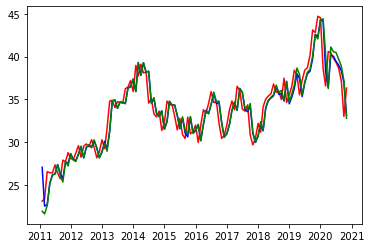

In [83]:
plt.plot(GSK.index[3:],GSK_actual,'r')
plt.plot(GSK.index[3:],GSK_base,'b')
plt.plot(GSK.index[3:],GSK_vaccine,'g')